(sec:numpy)=
# working with numpy arrays

This notebook demonstrates how to use differences and sums to calculate derivatives and integrals and make some simple plots using the matplotlib module.

Coverage:  [Kazrinoff Chapter 6](https://atsc_web.eoas.ubc.ca/NumPy-and-Arrays/Introduction.html#)

In [1]:
import numpy as np
from matplotlib import pyplot as plt


def cubeit(x, a, b):
    """
    construct cubic polynomial of the form
      y = ax^3 + b
    
    Parameters
    ----------
    
    x: vector or float
      x values 
      
    a: float
      coefficient to multiply
      
    b: float
       coefficient to add
    """
    return a * x ** 3 + b

## 1) Take the derivative of this function with python

Find the first derivative of $y = 6x^3 + 5$


Answer: $\frac{dy}{dx} = 18x^2$

In first year you learned that the first derivative was:

$\frac{dy}{dx} = \lim_{\Delta x \to 0} \frac{\Delta y}{\Delta x}$

So calculate $\Delta y$ and $\Delta x$ in python using [numpy.diff](http://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html) and divide, does it agree with the calculus answer?

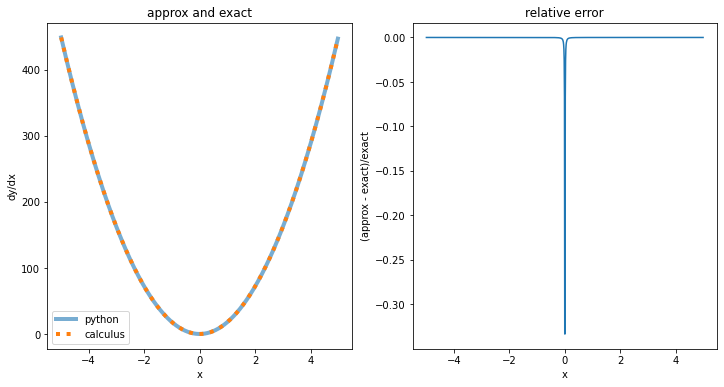

In [2]:
%matplotlib inline
#
# create 1000 x values from -5 to 5
#
spacing = 0.01
x = np.arange(-5, 5, spacing)
#
# find dx and dy
#
dx = np.diff(x)
y = cubeit(x, 6, 5)
dy = np.diff(y)
deriv = dy / dx
#
# compare to the exact answer
# note that deriv is one element shorter than x or y, so find
# the average value for each interval so they line up
#
exact = 18 * x ** 2.0
exact = (exact[1:] + exact[:-1]) / 2.0
avgx = (x[1:] + x[:-1]) / 2.0
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.plot(avgx, deriv, linewidth=4, alpha=0.6, label="python")
ax1.plot(avgx, exact, linestyle=":", linewidth=4, label="calculus")
ax1.legend()
ax1.set(xlabel="x", ylabel="dy/dx", title="approx and exact")
ax2.plot(avgx, (deriv - exact) / exact)
_ = ax2.set(ylabel="(approx - exact)/exact", xlabel="x", title="relative error")

### What's going on above at x=0?

## 2) Find the definite integral of this function with python

In first year you learned that if you start with this sum:

$\sum\limits_{x= -5}^{x=+5} \left ( 6x^3 + 5 \right ) \Delta x$

and take $\lim_{\Delta x \to 0}$  you get the definite integral $I =\int_{-5}^5 \left ( 6 x^3 + 5 \right ) dx$

which Newton and Liebniz figured out resulted in $I=50$:

$\int_{-5}^5 6 x^3 + 5 dx = \left .\left (  (6/4)x^4 + 5x \right ) \right |_{-5}^5 = (6/4)*(5^4 - (-5)^4) + ((5\times 5) - ((-5)\times 5)) = 50$

So to do this integral in python, just use numpy.sum(I*dx).  The only trick is that np.diff(x) creates a vector that is 1 shorter than x.  So replace y with the average value of y in each dx inteval so that you can multiply vectors of the same length.

In [3]:
yavg = (y[1:] + y[:-1]) / 2.0
np.sum(yavg * dx)

42.47245502984026

This isn't very close to the right answer, even though we are using 1000 x values when spacing=0.01.  Why is python struggling?